# Project : H-1B Visa Case Prediction

# Problem Statement

H-1B visas are a category of employment-based, non-immigrant visas for temporary foreign workers in the United States. 

For a foreign national to apply for H1-B visa, a US employer must offer them a job and submit a petition for a H-1B visa to the US immigration department. 

This is also the most common visa status applied for and held by international students once they complete college or higher education and begin working in a full-time position.

This dataset contains five year's worth of H-1B petition data, with approximately 3 million records overall. 
We aim to predict the outcome of H-1B visa applications that are filed by many high-skilled foreign nationals every year. We framed the problem as a classification problem and applied different Machine Learning Algorithms in order to output a
predicted case status of the application. 

The input to our algorithm is the attributes of the applicant which will be further explained in the following parts.

# Analysis Of the problem statement

Let's first understand the dataset provided and using that dataset we will try to understand the above problem in Machine Learning World.

Since the dataset is huge let's load it using python itself.

In [1]:
import os
os.getcwd()

'C:\\Users\\Kajal\\Desktop\\H-1BVisa'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading All required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE

# Importing the dataset

In [4]:
#Loading csv file into DataFrame
df=pd.read_csv('H-1B_Visa.csv')

In [5]:
df.head()

,Unnamed: 0,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,0,I-200-16055-173457,CERTIFIED-WITHDRAWN,2016-02-24,2016-10-01,H-1B,2016-08-10,2019-08-10,DISCOVER PRODUCTS INC.,NaN,...,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015,2016-03-01
1,1,I-200-16064-557834,CERTIFIED-WITHDRAWN,2016-03-04,2016-10-01,H-1B,2016-08-16,2019-08-16,DFS SERVICES LLC,NaN,...,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015,2016-03-08
2,2,I-200-16063-996093,CERTIFIED-WITHDRAWN,2016-03-10,2016-10-01,H-1B,2016-09-09,2019-09-09,EASTBANC TECHNOLOGIES LLC,NaN,...,Y,N,Y,NaN,NaN,WASHINGTON,NaN,DC,20007,2016-03-16
3,3,I-200-16272-196340,WITHDRAWN,2016-09-28,2016-10-01,H-1B,2017-01-26,2020-01-25,INFO SERVICES LLC,NaN,...,Y,N,Y,NaN,NaN,JERSEY CITY,HUDSON,NJ,07302,NaN
4,4,I-200-15053-636744,CERTIFIED-WITHDRAWN,2015-02-22,2016-10-02,H-1B,2015-03-01,2018-03-01,BB&T CORPORATION,NaN,...,N,N,NaN,Y,NaN,NEW YORK,NEW YORK,NY,10036,2015-02-26


Let's understand the above data. As it contains so many columns.For more information about invidual columns, refer to the column data. 

A detailed description of raw dataset is available in the zip folder of this file.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624650 entries, 0 to 624649
Data columns (total 53 columns):
Unnamed: 0                     624650 non-null int64
CASE_NUMBER                    624650 non-null object
CASE_STATUS                    624650 non-null object
CASE_SUBMITTED                 624650 non-null object
DECISION_DATE                  624650 non-null object
VISA_CLASS                     624650 non-null object
EMPLOYMENT_START_DATE          624621 non-null object
EMPLOYMENT_END_DATE            624620 non-null object
EMPLOYER_NAME                  624594 non-null object
EMPLOYER_BUSINESS_DBA          43270 non-null object
EMPLOYER_ADDRESS               624643 non-null object
EMPLOYER_CITY                  624635 non-null object
EMPLOYER_STATE                 624632 non-null object
EMPLOYER_POSTAL_CODE           624632 non-null object
EMPLOYER_COUNTRY               528143 non-null object
EMPLOYER_PROVINCE              6116 non-null object
EMPLOYER_PHONE               

In [7]:
df.describe()

,Unnamed: 0,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,PREVAILING_WAGE,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,PUBLIC_DISCLOSURE_LOCATION
count,624650.000000,624650.000000,624650.000000,624650.000000,624650.000000,624650.000000,624650.000000,624650.000000,6.246490e+05,624605.000000,6.246500e+05,6.246490e+05,0.0
mean,312324.500000,1.893800,0.834251,0.326300,0.130657,0.008979,0.259485,0.332703,7.321117e+04,2016.167059,8.285702e+04,2.416596e+04,NaN
std,180321.067162,4.826703,3.556236,1.243793,0.955791,0.157690,1.095563,1.418231,2.574025e+05,5.128159,4.266316e+04,5.255090e+04,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
25%,156162.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.682600e+04,2016.000000,6.300000e+04,0.000000e+00,NaN
50%,312324.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.022100e+04,2016.000000,7.600000e+04,0.000000e+00,NaN
75%,468486.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.914900e+04,2017.000000,1.000000e+05,0.000000e+00,NaN
max,624649.000000,155.000000,150.000000,55.000000,50.000000,50.000000,150.000000,50.000000,2.016227e+08,2017.000000,1.688000e+06,3.000000e+06,NaN


In [8]:
#Checking Dimension of Data
df.shape

(624650, 53)

Ok we understood the dataset, as we want to predict case status of H1B visa applications.

Let's try to understand the same problem from Machine Learning point of view.

In [9]:
#Checking columns in above dataset
df.columns

Index(['Unnamed: 0', 'CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED',
       'DECISION_DATE', 'VISA_CLASS', 'EMPLOYMENT_START_DATE',
       'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME', 'EMPLOYER_BUSINESS_DBA',
       'EMPLOYER_ADDRESS', 'EMPLOYER_CITY', 'EMPLOYER_STATE',
       'EMPLOYER_POSTAL_CODE', 'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE',
       'EMPLOYER_PHONE', 'EMPLOYER_PHONE_EXT', 'AGENT_REPRESENTING_EMPLOYER',
       'AGENT_ATTORNEY_NAME', 'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE',
       'JOB_TITLE', 'SOC_CODE', 'SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS',
       'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY',
       'PW_WAGE_LEVEL', 'PW_SOURCE', 'PW_SOURCE_YEAR', 'PW_SOURCE_OTHER',
       'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY',
       'H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'LAB

In [10]:
df['VISA_CLASS'].value_counts()

H-1B               610304
E-3 Australian      12157
H-1B1 Singapore      1254
H-1B1 Chile           935
Name: VISA_CLASS, dtype: int64

In [11]:
df=df[df['VISA_CLASS']=='H-1B']
df.head()

,Unnamed: 0,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,0,I-200-16055-173457,CERTIFIED-WITHDRAWN,2016-02-24,2016-10-01,H-1B,2016-08-10,2019-08-10,DISCOVER PRODUCTS INC.,NaN,...,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015,2016-03-01
1,1,I-200-16064-557834,CERTIFIED-WITHDRAWN,2016-03-04,2016-10-01,H-1B,2016-08-16,2019-08-16,DFS SERVICES LLC,NaN,...,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015,2016-03-08
2,2,I-200-16063-996093,CERTIFIED-WITHDRAWN,2016-03-10,2016-10-01,H-1B,2016-09-09,2019-09-09,EASTBANC TECHNOLOGIES LLC,NaN,...,Y,N,Y,NaN,NaN,WASHINGTON,NaN,DC,20007,2016-03-16
3,3,I-200-16272-196340,WITHDRAWN,2016-09-28,2016-10-01,H-1B,2017-01-26,2020-01-25,INFO SERVICES LLC,NaN,...,Y,N,Y,NaN,NaN,JERSEY CITY,HUDSON,NJ,07302,NaN
4,4,I-200-15053-636744,CERTIFIED-WITHDRAWN,2015-02-22,2016-10-02,H-1B,2015-03-01,2018-03-01,BB&T CORPORATION,NaN,...,N,N,NaN,Y,NaN,NEW YORK,NEW YORK,NY,10036,2015-02-26


Since there are categorical possible so we can call it Classification problem.

In [12]:
#Checking Dimension Of data
df.shape

(610304, 53)

In [13]:
drop=['Unnamed: 0','CASE_NUMBER','EMPLOYER_BUSINESS_DBA','EMPLOYER_ADDRESS','EMPLOYER_CITY','EMPLOYER_POSTAL_CODE','EMPLOYER_COUNTRY','EMPLOYER_PROVINCE','EMPLOYER_PHONE','EMPLOYER_PHONE_EXT','AGENT_ATTORNEY_NAME','AGENT_ATTORNEY_CITY','SOC_CODE','PUBLIC_DISCLOSURE_LOCATION','WORKSITE_CITY','WORKSITE_COUNTY','WORKSITE_POSTAL_CODE','ORIGINAL_CERT_DATE']

In [14]:
df=df.drop(drop,1)

Removing the unneccessary columns as they does not contain any relevant information to predict outcome.

In [15]:
#Checking Dimension of data After Removing Columns
df.shape

(610304, 35)

# Data Cleaning

In [16]:
# Taking care of Missing Data
df.isnull().sum()

CASE_STATUS                         0
CASE_SUBMITTED                      0
DECISION_DATE                       0
VISA_CLASS                          0
EMPLOYMENT_START_DATE              24
EMPLOYMENT_END_DATE                24
EMPLOYER_NAME                      54
EMPLOYER_STATE                     18
AGENT_REPRESENTING_EMPLOYER     92941
AGENT_ATTORNEY_STATE           281594
JOB_TITLE                           5
SOC_NAME                            3
NAICS_CODE                          7
TOTAL_WORKERS                       0
NEW_EMPLOYMENT                      0
CONTINUED_EMPLOYMENT                0
CHANGE_PREVIOUS_EMPLOYMENT          0
NEW_CONCURRENT_EMPLOYMENT           0
CHANGE_EMPLOYER                     0
AMENDED_PETITION                    0
FULL_TIME_POSITION                  5
PREVAILING_WAGE                     1
PW_UNIT_OF_PAY                     32
PW_WAGE_LEVEL                  119458
PW_SOURCE                          31
PW_SOURCE_YEAR                     31
PW_SOURCE_OT

We can see many columns with missing data. Now the question is what to do with this missing value.

1.One way could be that we can drop these columns having missing values but there might be some columns which is containing some relevant information so we can not remove it directly.

2.So the second way what we can do is we will remove the columns with more than 30% missing data and replace it with mode because it might be containing some synthetic data.

In [17]:
x=df.isnull().sum()/df.shape[0]*100
miss=x[x>30]
miss=list(miss.index)
miss

['AGENT_ATTORNEY_STATE', 'SUPPORT_H1B', 'LABOR_CON_AGREE']

In [18]:
df=df.drop(miss,1)
df.head()

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,...,PW_WAGE_LEVEL,PW_SOURCE,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE
0,CERTIFIED-WITHDRAWN,2016-02-24,2016-10-01,H-1B,2016-08-10,2019-08-10,DISCOVER PRODUCTS INC.,IL,Y,ASSOCIATE DATA INTEGRATION,...,Level I,OES,2015.0,OFLC ONLINE DATA CENTER,65811.0,67320.0,Year,N,N,IL
1,CERTIFIED-WITHDRAWN,2016-03-04,2016-10-01,H-1B,2016-08-16,2019-08-16,DFS SERVICES LLC,IL,Y,SENIOR ASSOCIATE,...,NaN,Other,2015.0,TOWERS WATSON DATA SERVICES 2015 CSR PROFESSIO...,53000.0,57200.0,Year,N,N,IL
2,CERTIFIED-WITHDRAWN,2016-03-10,2016-10-01,H-1B,2016-09-09,2019-09-09,EASTBANC TECHNOLOGIES LLC,DC,Y,.NET SOFTWARE PROGRAMMER,...,Level II,OES,2015.0,OFLC ONLINE DATA CENTER,77000.0,0.0,Year,Y,N,DC
3,WITHDRAWN,2016-09-28,2016-10-01,H-1B,2017-01-26,2020-01-25,INFO SERVICES LLC,MI,N,PROJECT MANAGER,...,Level III,OES,2016.0,OFLC ONLINE DATA CENTER,102000.0,0.0,Year,Y,N,NJ
4,CERTIFIED-WITHDRAWN,2015-02-22,2016-10-02,H-1B,2015-03-01,2018-03-01,BB&T CORPORATION,NC,Y,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,...,Level III,OES,2015.0,OFLC ONLINE DATA CENTER,132500.0,0.0,Year,N,N,NY


In [19]:
df.shape

(610304, 32)

In [20]:
df=df.drop(['JOB_TITLE'],1)
df.shape

(610304, 31)

In [21]:
df.isnull().sum()

CASE_STATUS                         0
CASE_SUBMITTED                      0
DECISION_DATE                       0
VISA_CLASS                          0
EMPLOYMENT_START_DATE              24
EMPLOYMENT_END_DATE                24
EMPLOYER_NAME                      54
EMPLOYER_STATE                     18
AGENT_REPRESENTING_EMPLOYER     92941
SOC_NAME                            3
NAICS_CODE                          7
TOTAL_WORKERS                       0
NEW_EMPLOYMENT                      0
CONTINUED_EMPLOYMENT                0
CHANGE_PREVIOUS_EMPLOYMENT          0
NEW_CONCURRENT_EMPLOYMENT           0
CHANGE_EMPLOYER                     0
AMENDED_PETITION                    0
FULL_TIME_POSITION                  5
PREVAILING_WAGE                     1
PW_UNIT_OF_PAY                     32
PW_WAGE_LEVEL                  119458
PW_SOURCE                          31
PW_SOURCE_YEAR                     31
PW_SOURCE_OTHER                  5931
WAGE_RATE_OF_PAY_FROM               0
WAGE_RATE_OF

Let's cross check once again for missing values. Still there are some missing values.

In [22]:
#Making Unknown category for large missing and relevant data
df['AGENT_REPRESENTING_EMPLOYER']=df['AGENT_REPRESENTING_EMPLOYER'].fillna('Unknown')
df['PW_WAGE_LEVEL']=df['PW_WAGE_LEVEL'].fillna('Other')
df['H1B_DEPENDENT']=df['H1B_DEPENDENT'].fillna('Unknown')
df['WILLFUL_VIOLATOR']=df['WILLFUL_VIOLATOR'].fillna('Unknown')

Creating new dummy column for large missing data

In [23]:
#df['PW_SOURCE_OTHER']

In [24]:
#Dropping useless column
df=df.drop(['PW_SOURCE_OTHER'],1)

In [25]:
#df.shape

In [26]:
cols=df.columns
for column in cols:
    df[column].fillna(df[column].mode()[0],inplace=True)

In [27]:
df.isnull().sum()

CASE_STATUS                    0
CASE_SUBMITTED                 0
DECISION_DATE                  0
VISA_CLASS                     0
EMPLOYMENT_START_DATE          0
EMPLOYMENT_END_DATE            0
EMPLOYER_NAME                  0
EMPLOYER_STATE                 0
AGENT_REPRESENTING_EMPLOYER    0
SOC_NAME                       0
NAICS_CODE                     0
TOTAL_WORKERS                  0
NEW_EMPLOYMENT                 0
CONTINUED_EMPLOYMENT           0
CHANGE_PREVIOUS_EMPLOYMENT     0
NEW_CONCURRENT_EMPLOYMENT      0
CHANGE_EMPLOYER                0
AMENDED_PETITION               0
FULL_TIME_POSITION             0
PREVAILING_WAGE                0
PW_UNIT_OF_PAY                 0
PW_WAGE_LEVEL                  0
PW_SOURCE                      0
PW_SOURCE_YEAR                 0
WAGE_RATE_OF_PAY_FROM          0
WAGE_RATE_OF_PAY_TO            0
WAGE_UNIT_OF_PAY               0
H1B_DEPENDENT                  0
WILLFUL_VIOLATOR               0
WORKSITE_STATE                 0
dtype: int

Awesome, so all missing values are gone now. Let's move to the feature engineering part.

# Feature Engineering

In [28]:
#Converting columns to days
df['CASE_SUBMITTED']=pd.to_datetime(df['CASE_SUBMITTED'])
df['DECISION_DATE']=pd.to_datetime(df['DECISION_DATE'])
df['DECISION_DAYS']=(df['DECISION_DATE']-df['CASE_SUBMITTED']).dt.days
df=df.drop(['CASE_SUBMITTED','DECISION_DATE'],1)

In [29]:
df=df[df['PW_SOURCE_YEAR']>1900]
df['PW_SOURCE_DURATION']=2019-df['PW_SOURCE_YEAR']
df=df.drop(['PW_SOURCE_YEAR'],1)

In [30]:
#Converting columns into duration
df['EMPLOYMENT_END_DATE']=pd.to_datetime(df['EMPLOYMENT_END_DATE'])
df['EMPLOYMENT_START_DATE']=pd.to_datetime(df['EMPLOYMENT_START_DATE'])
df['EMPLOYMENT_DURATION']=(df['EMPLOYMENT_END_DATE']-df['EMPLOYMENT_START_DATE']).dt.days
df=df.drop(['EMPLOYMENT_START_DATE','EMPLOYMENT_END_DATE'],1)

Converting the two columns 'EMPLOYMENT_START_DATE' and 'EMPLOYMENT_END_DATE' into pandas date time format and 

then into 'EMPLOYMENT_DURATION'

In [31]:
df['PW_UNIT_OF_PAY'].value_counts()

Year         572543
Hour          37305
Month           295
Week            113
Bi-Weekly        45
Name: PW_UNIT_OF_PAY, dtype: int64

In [32]:
df.groupby(['FULL_TIME_POSITION','PW_UNIT_OF_PAY']).describe()['PREVAILING_WAGE']

count          mean            std  \
FULL_TIME_POSITION PW_UNIT_OF_PAY                                          
N                  Hour             13347.0     32.608866      23.776460   
                   Year                17.0  57669.764706   38096.010842   
Y                  Bi-Weekly           45.0   9145.600889   24956.450419   
                   Hour             23958.0    305.431696    4338.619456   
                   Month              295.0   8023.570644   16339.188872   
                   Week               113.0   4143.821770   12832.266642   
                   Year            572526.0  77763.491641  268051.144977   

                                      min       25%       50%       75%  \
FULL_TIME_POSITION PW_UNIT_OF_PAY                                         
N                  Hour              7.25     22.81     27.95     35.71   
                   Year              0.00  38584.00  52478.00  83304.00   
Y                  Bi-Weekly       700.00   2064.09   2446.46   4120.00   
                   Hour              0.00     26.33     32.50     39.43   
                   Month             0.00   3206.00   4135.00   5968.00   
                   Week              0.00    943.20   1135.19   1463.84   
                   Year              0.00  60000.00  71843.00  90376.00   

                                           max  
FULL_TIME_POSITION PW_UNIT_OF_PAY               
N                  Hour                 2017.0  
                   Year               135387.0  
Y                  Bi-Weekly          145000.0  
                   Hour               192962.0  
                   Month              148283.0  
                   Week                74734.0  
                   Year            201622735.0

The above cells shows us how the wage is varied

1.You might notice some abnormal values like the max hourly pay as 2017.0,etc,etc.

2.These are called outliers and our data has lot of it.

In [33]:
df.loc[df['PW_UNIT_OF_PAY']=='Month','PREVAILING_WAGE']=df.loc[df['PW_UNIT_OF_PAY']=='Month','PREVAILING_WAGE']*12
df.loc[df['PW_UNIT_OF_PAY']=='Week','PREVAILING_WAGE']=df.loc[df['PW_UNIT_OF_PAY']=='Week','PREVAILING_WAGE']*52
df.loc[df['PW_UNIT_OF_PAY']=='Hour','PREVAILING_WAGE']=df.loc[df['PW_UNIT_OF_PAY']=='Hour','PREVAILING_WAGE']*8*5*52
df.loc[df['PW_UNIT_OF_PAY']=='Bi-Weekly','PREVAILING_WAGE']=df.loc[df['PW_UNIT_OF_PAY']=='Bi-Weekly','PREVAILING_WAGE']*26
df=df.drop(['PW_UNIT_OF_PAY'],1)

In [34]:
df['WAGE_UNIT_OF_PAY'].value_counts()

Year         572644
Hour          36987
Month           419
Week            151
Bi-Weekly       100
Name: WAGE_UNIT_OF_PAY, dtype: int64

In [35]:
#Transforming the wage column into same unit "Year"
df.loc[df['WAGE_UNIT_OF_PAY']=='Month','WAGE_RATE_OF_PAY_FROM']=df.loc[df['WAGE_UNIT_OF_PAY']=='Month','WAGE_RATE_OF_PAY_FROM']*12
df.loc[df['WAGE_UNIT_OF_PAY']=='Week','WAGE_RATE_OF_PAY_FROM']=df.loc[df['WAGE_UNIT_OF_PAY']=='Week','WAGE_RATE_OF_PAY_FROM']*52
df.loc[df['WAGE_UNIT_OF_PAY']=='Hour','WAGE_RATE_OF_PAY_FROM']=df.loc[df['WAGE_UNIT_OF_PAY']=='Hour','WAGE_RATE_OF_PAY_FROM']*8*5*52
df.loc[df['WAGE_UNIT_OF_PAY']=='Bi-Weekly','WAGE_RATE_OF_PAY_FROM']=df.loc[df['WAGE_UNIT_OF_PAY']=='Bi-Weekly','WAGE_RATE_OF_PAY_FROM']*26

In [36]:
df.loc[df['WAGE_UNIT_OF_PAY']=='Month','WAGE_RATE_OF_PAY_TO']=df.loc[df['WAGE_UNIT_OF_PAY']=='Month','WAGE_RATE_OF_PAY_TO']*12
df.loc[df['WAGE_UNIT_OF_PAY']=='Week','WAGE_RATE_OF_PAY_TO']=df.loc[df['WAGE_UNIT_OF_PAY']=='Week','WAGE_RATE_OF_PAY_TO']*52
df.loc[df['WAGE_UNIT_OF_PAY']=='Hour','WAGE_RATE_OF_PAY_TO']=df.loc[df['WAGE_UNIT_OF_PAY']=='Hour','WAGE_RATE_OF_PAY_TO']*8*5*52
df.loc[df['WAGE_UNIT_OF_PAY']=='Bi-Weekly','WAGE_RATE_OF_PAY_TO']=df.loc[df['WAGE_UNIT_OF_PAY']=='Bi-Weekly','WAGE_RATE_OF_PAY_TO']*26
df=df.drop(['WAGE_UNIT_OF_PAY'],1)

To make our analysis easy In above part we have use some logic for getting wages on one unit(year). 

Let's first convert Month,Week,Hour,Bi-Weekly into annual pay: 
1. Monthly pay is multiplied by 12.(As we have 12 months per year)
2. Weekly pay is multiplied by 52.(As we have 52 weeks per year)
3. Hourly pay is multiplied by 8*5*52.(we have used here logic 8hr per day,5day per week,52week per year )
4. Bi-weekly pay is multiplied by *26. (As We have 2 bi-weeks per year.)

# Encoding Categorical and Numerical data

In [37]:
df['CASE_STATUS'].value_counts()

CERTIFIED              533620
CERTIFIED-WITHDRAWN     48880
WITHDRAWN               20322
DENIED                   7479
Name: CASE_STATUS, dtype: int64

About 'CASE STATUS':Status associated with the last significant event or decision.

Valid values include “Certified,” “Certified-Withdrawn,” Denied,” and “Withdrawn”

Looking at the above we understood that there are too many cateogical feature with unique counts.
So this a class imbalance problem.

With imbalanced data sets, an algorithm doesn’t get the necessary information about the minority class to make an accurate prediction. Hence, it is desirable to use ML algorithms with balanced data sets. Then, how should we deal with imbalanced data sets ? The methods are simple. we used 2 approaches:

As the above data contains categorical data and we know machine learning is based on Mathematical equations.
So we have encoded our data so that machine will understand. There are 2 ways to encode our data.

1.Label Encoder:It is used to transform non-numerical labels to numerical labels (or nominal categorical variables). Numerical labels are always between 0 and n_classes-1

2.One-Hot-Encoder:One-Hot Encoding transforms each categorical feature with n possible values into n binary features, with only one active.

In our case we used LabelEncoder.

In [38]:
#Transforming target into two classes
df.loc[df['CASE_STATUS']=='DENIED','NEW_CASE_STATUS']='NOT_CERTIFIED'
df.loc[df['CASE_STATUS']=='WITHDRAWN','NEW_CASE_STATUS']='NOT_CERTIFIED'
df.loc[df['CASE_STATUS']=='CERTIFIED','NEW_CASE_STATUS']='CERTIFIED'
df=df.drop(['CASE_STATUS'],1)

We have transform the 'DENIED' and 'WITHDRAW' into 'NOT_CERTIFIED' category and 'CERTIFIED' into 'CERTIFIED' category.

And removed the 'CERTIFIED_WITHDWARN' column

In [39]:
df=df[(df['NEW_CASE_STATUS']=='CERTIFIED') | (df['NEW_CASE_STATUS']=='NOT_CERTIFIED')]

In [40]:
df=df.drop(['VISA_CLASS'],1)

In [41]:
df.columns

Index(['EMPLOYER_NAME', 'EMPLOYER_STATE', 'AGENT_REPRESENTING_EMPLOYER',
       'SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS', 'NEW_EMPLOYMENT',
       'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_WAGE_LEVEL', 'PW_SOURCE',
       'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'H1B_DEPENDENT',
       'WILLFUL_VIOLATOR', 'WORKSITE_STATE', 'DECISION_DAYS',
       'PW_SOURCE_DURATION', 'EMPLOYMENT_DURATION', 'NEW_CASE_STATUS'],
      dtype='object')

In [42]:
#Drop the useless column
df=df.drop(['WAGE_RATE_OF_PAY_TO'],1)

In [43]:
df_num=df.select_dtypes(include=[np.number])
df_cat=df.select_dtypes(exclude=[np.number])
df_cat_not_encoded=df.select_dtypes(exclude=[np.number])

In [44]:
df_cat=df_cat.drop(['NAICS_CODE'],1)

Drop the useless column 'NAICS_CODE' from the encoded categorical column

In [45]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=df_cat.columns
for val in cols:
    df_cat[val]=df_cat[val].astype('category')
    df_cat['Original'+str(val)]=df_cat[val]
    df_cat[val]=le.fit_transform(df_cat[val])

In [46]:
df_cat.columns

Index(['EMPLOYER_NAME', 'EMPLOYER_STATE', 'AGENT_REPRESENTING_EMPLOYER',
       'SOC_NAME', 'FULL_TIME_POSITION', 'PW_WAGE_LEVEL', 'PW_SOURCE',
       'H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'WORKSITE_STATE',
       'NEW_CASE_STATUS', 'OriginalEMPLOYER_NAME', 'OriginalEMPLOYER_STATE',
       'OriginalAGENT_REPRESENTING_EMPLOYER', 'OriginalSOC_NAME',
       'OriginalFULL_TIME_POSITION', 'OriginalPW_WAGE_LEVEL',
       'OriginalPW_SOURCE', 'OriginalH1B_DEPENDENT',
       'OriginalWILLFUL_VIOLATOR', 'OriginalWORKSITE_STATE',
       'OriginalNEW_CASE_STATUS'],
      dtype='object')

In [47]:
df_num.columns

Index(['TOTAL_WORKERS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT',
       'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'PREVAILING_WAGE',
       'WAGE_RATE_OF_PAY_FROM', 'DECISION_DAYS', 'PW_SOURCE_DURATION',
       'EMPLOYMENT_DURATION'],
      dtype='object')

In [48]:
df_cat_encoded=df_cat[['EMPLOYER_NAME','EMPLOYER_STATE','AGENT_REPRESENTING_EMPLOYER','SOC_NAME','FULL_TIME_POSITION','PW_WAGE_LEVEL','PW_SOURCE','H1B_DEPENDENT','WILLFUL_VIOLATOR','WORKSITE_STATE','NEW_CASE_STATUS']]

In [49]:
# Concatenating numerical and categorical column into pandas dataframe
df_tot=pd.concat([df_num,df_cat],1)
df=pd.concat([df_num,df_cat_encoded],1)

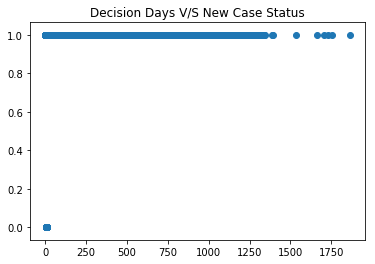

In [50]:
#Visualizing data
plt.scatter(df['DECISION_DAYS'],df['NEW_CASE_STATUS'])
plt.title('Decision Days V/S New Case Status')
plt.show()

In [51]:
df[df['NEW_CASE_STATUS']==0]['DECISION_DAYS'].describe()

count    533620.000000
mean          5.744888
std           0.894924
min           4.000000
25%           6.000000
50%           6.000000
75%           6.000000
max          11.000000
Name: DECISION_DAYS, dtype: float64

In [52]:
df[df['NEW_CASE_STATUS']==1]['DECISION_DAYS'].describe()

count    27801.000000
mean        87.434948
std        246.064620
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max       1863.000000
Name: DECISION_DAYS, dtype: float64

# Building Machine Learning Model

In [53]:
df_minor = df[df["NEW_CASE_STATUS"]==1]
df_major = df[df["NEW_CASE_STATUS"]==0]
df_major = df_major.sample(n=40000)
df = pd.concat([df_minor,df_major])

In [54]:
X=df.drop(['NEW_CASE_STATUS','DECISION_DAYS'],1)
y=df['NEW_CASE_STATUS']

In [55]:
col1=list(X)

In [56]:
#SMOTE for high-dimensional class-imbalanced data
sm=SMOTE(random_state=42)
X_res,y_res=sm.fit_resample(X,y)
y_s=pd.Series(y_res)

In [57]:
#Spliting Data into Train and Test Set
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=42)

Random Forest Classifier

In [58]:
rfc=RandomForestClassifier(random_state=42,n_estimators=100)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [59]:
print(accuracy_score(y_test,y_pred))

0.7144191534339511


In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78     12091
           1       0.69      0.53      0.60      8250

   micro avg       0.71      0.71      0.71     20341
   macro avg       0.71      0.69      0.69     20341
weighted avg       0.71      0.71      0.71     20341



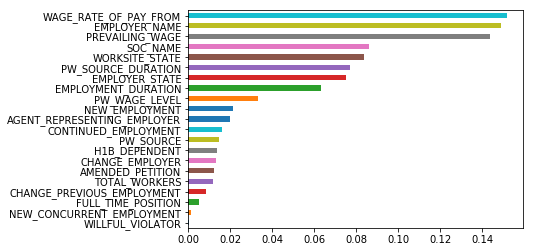

In [61]:
#Feature Importances
fi=pd.Series(rfc.feature_importances_,index=list(X)).sort_values(ascending=True).plot(kind='barh')
plt.show()

In [62]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

In [63]:
bag_clf=BaggingClassifier(base_estimator=dt,n_estimators=50,bootstrap=True,n_jobs=-1,random_state=42)
bag_clf.fit(X_train,y_train)
y_pred_bag=bag_clf.predict(X_test)
print(accuracy_score(y_test,y_pred_bag))

0.7112236369893319


In [64]:
ada_clf=AdaBoostClassifier(dt,n_estimators=50)
ada_clf.fit(X_train,y_train)
y_pred_ada=ada_clf.predict(X_test)
print(accuracy_score(y_test,y_pred_ada))

0.6718450420333317


In [65]:
gb=GradientBoostingClassifier(max_depth=4)
gb.fit(X_train,y_train)
y_pred_gb=gb.predict(X_test)
print(accuracy_score(y_test,y_pred_gb))

0.6852662111007325


In [66]:
xgb_clf=xgb.XGBClassifier()
xgb_clf.fit(X_train,y_train.ravel())
y_pred_xgb=xgb_clf.predict(X_test)
print(accuracy_score(y_test,y_pred_xgb))

0.6741556462317487


# Data Insights

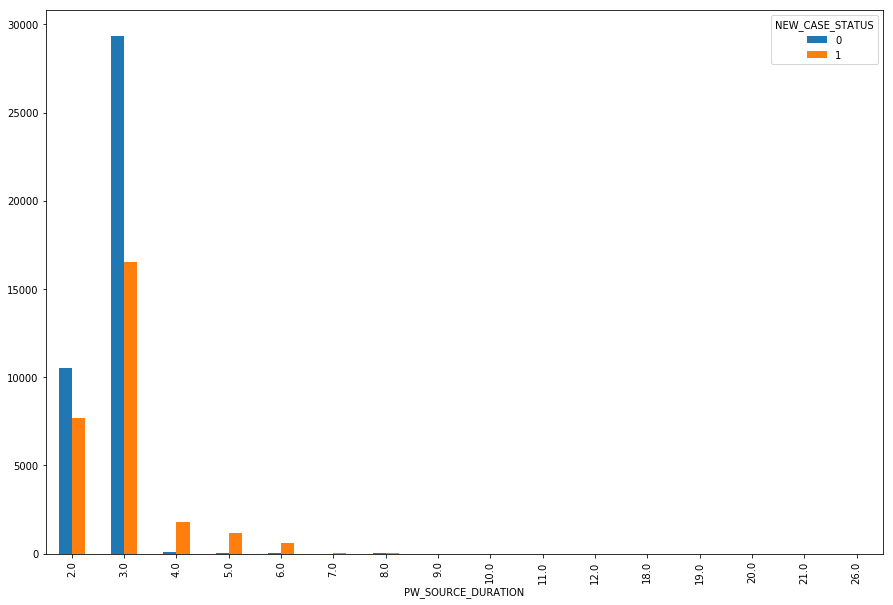

In [67]:
res=df.groupby(['PW_SOURCE_DURATION','NEW_CASE_STATUS']).size().unstack()
res.plot(kind='bar',stacked=False,figsize=(15,10))
plt.show()

In [68]:
d=df[df['NEW_CASE_STATUS']==0]
emp_certified=d['EMPLOYER_NAME'].value_counts()
top_10_emp_certified=emp_certified.sort_values(ascending=False).head(10)
top_cert=top_10_emp_certified.index.values
top_cert

array([28167, 55501,  9970, 55673, 27137, 15817,   921, 19413, 63281,
       25338], dtype=int64)

In [69]:
df_top_10 = df_tot[(df_tot["EMPLOYER_NAME"]==28167) | (df_tot["EMPLOYER_NAME"]==27137) | (df_tot["EMPLOYER_NAME"]==55501) | (df_tot["EMPLOYER_NAME"]==9970) | (df_tot["EMPLOYER_NAME"]==27134) | (df_tot["EMPLOYER_NAME"]==15817) | (df_tot["EMPLOYER_NAME"]==55673) | (df_tot["EMPLOYER_NAME"]==921) | (df_tot["EMPLOYER_NAME"]==19413) | (df_tot["EMPLOYER_NAME"]==63281)]

Top Employers and it's case status bar

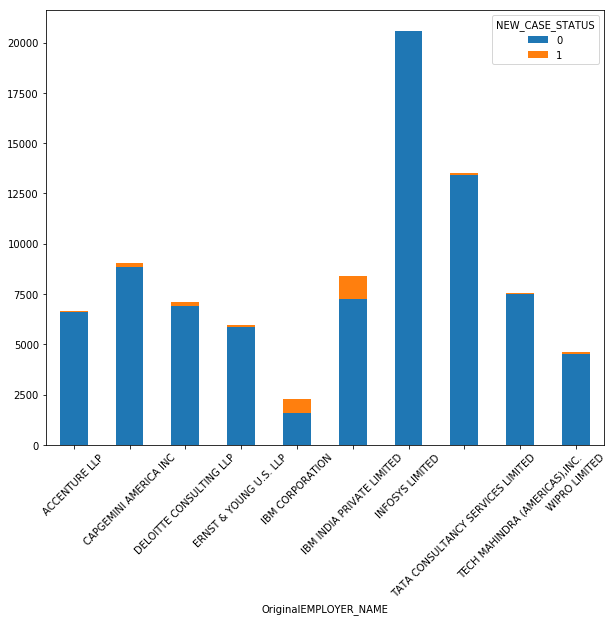

In [70]:
res=df_top_10.groupby(['OriginalEMPLOYER_NAME','NEW_CASE_STATUS']).size().unstack()
res.plot(kind='bar',stacked=True,figsize=(10,8))
plt.xticks(rotation=45)
plt.show()

In [71]:
d1=df[df['NEW_CASE_STATUS']==0]
soc=d1['SOC_NAME'].value_counts()
top_10_soc=soc.sort_values(ascending=False).head(10)
top_soc=top_10_soc.index.values
top_soc

array([710, 198, 183, 175, 197, 716, 469,  10, 543, 500], dtype=int64)

In [72]:
df_top_10_soc = df_tot[(df_tot["SOC_NAME"]==710) | (df_tot["SOC_NAME"]==198) | (df_tot["SOC_NAME"]==183) | (df_tot["SOC_NAME"]==175) | (df_tot["SOC_NAME"]==197) | (df_tot["SOC_NAME"]==716) | (df_tot["SOC_NAME"]==469) | (df_tot["SOC_NAME"]==10) | (df_tot["SOC_NAME"]==543) | (df_tot["SOC_NAME"]==563)]

Top 10 SOC NAMES and it's case status bar

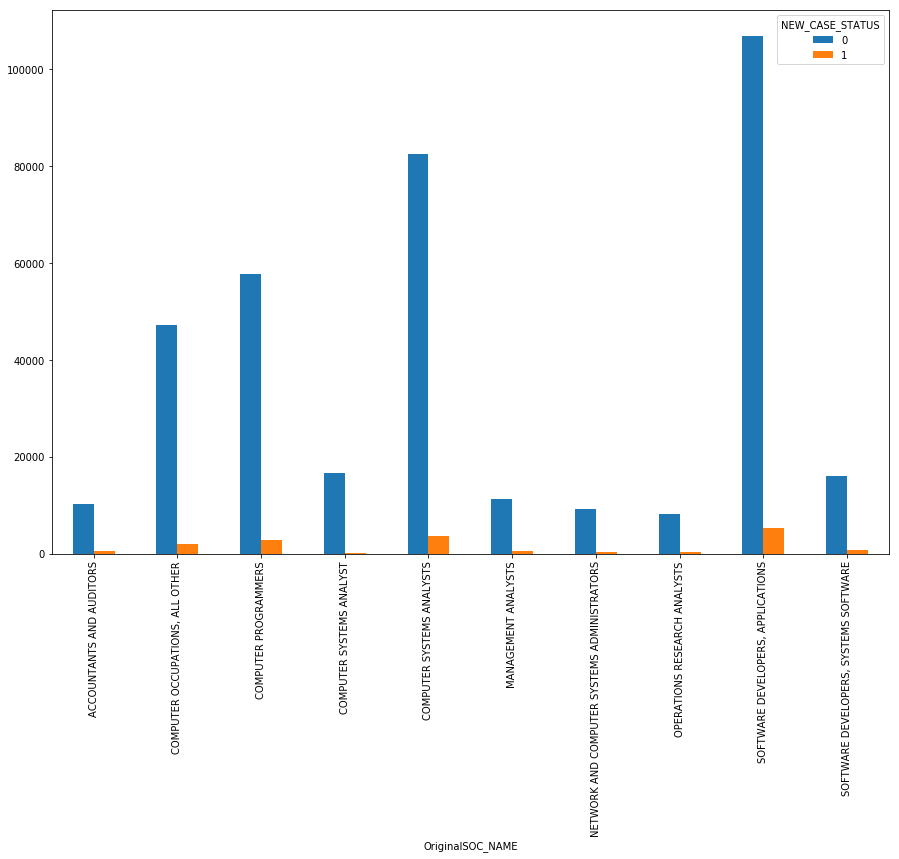

In [73]:
res=df_top_10_soc.groupby(['OriginalSOC_NAME','NEW_CASE_STATUS']).size().unstack()
res.plot(kind='bar',stacked=False,figsize=(15,10))
plt.show()

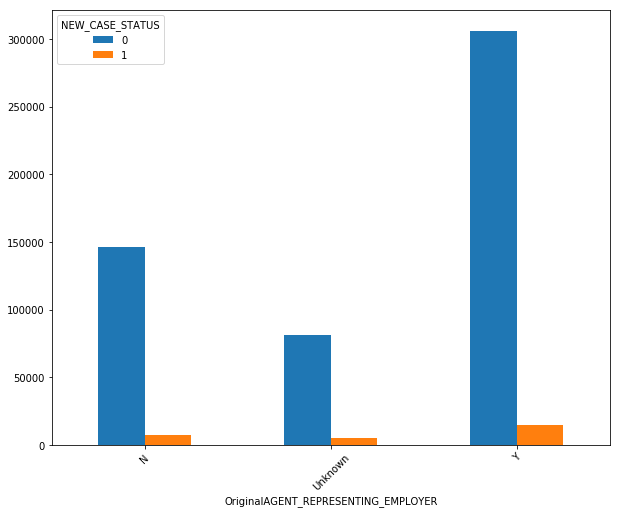

In [74]:
res = df_tot.groupby(['OriginalAGENT_REPRESENTING_EMPLOYER','NEW_CASE_STATUS']).size().unstack()
res.plot(kind='bar',stacked=False,figsize=(10,8))
plt.xticks(rotation = 45)
plt.show()

In the end, it is indeed possible to predict the outcome of H-1B Visa applications based on the attributes of the applicant using machine learning
Out of the models i tried Below are the accuracies using different models:
1. Decision Tree with bagging
2. Random Forest 
3. XGBoost

If we had more time and computational resources, there are several directions we could take to improve our prediction algorithm.